In [1]:
from scipy.ndimage.measurements import label as bwlabel
from skimage.measure import regionprops
from pylab import *

import seaborn as sns

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
sns.set()
rcParams['figure.figsize'] = (12, 8)

sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
sns.set_context("poster")

In [3]:
def percolation_matrix(p, L):
    """Creates and returns a labeled percolation matrix, and the number of clusters."""
    prob_matrix = rand(L, L)
    perc_matrix = prob_matrix < p
    label_perc_matrix, n_clusters = bwlabel(perc_matrix)
    return label_perc_matrix, n_clusters


def perc_mass(prob, Ls, k=1, simulations_per_p=10):
    perc_areas = zeros(len(Ls))
    
    for i, L in enumerate(Ls):
        simulation_i = 0
        
        while simulations_per_p > simulation_i:
            lw, num = percolation_matrix(prob, L)
            cluster_infos = regionprops(lw)
            
            bboxs = array(
                [cluster_infos[k]['bbox'] for k in range(len(cluster_infos))]
            ).astype(int)
            
            if len(bboxs) > 0:
                # indecies where Xmax - Xmin >= Lx
                jxs = argwhere(bboxs[:, 2] - bboxs[:, 0] >= L)
                # indecies where Ymax - Ymin >= Ly
                jys = argwhere(bboxs[:, 3] - bboxs[:, 1] >= L)
                js = unique(vstack((jxs, jys)))
                
                if len(js) > 0:
                    perc_areas[i] += sum([cluster_infos[j]['area'] for j in js])
                    
            simulation_i += 1
    perc_areas /= simulations_per_p
    perc_areas *= k
    return perc_areas


pc = 0.59275
Ls = array([2**k for k in range(4, 12)])

Ms = perc_mass(pc, Ls)

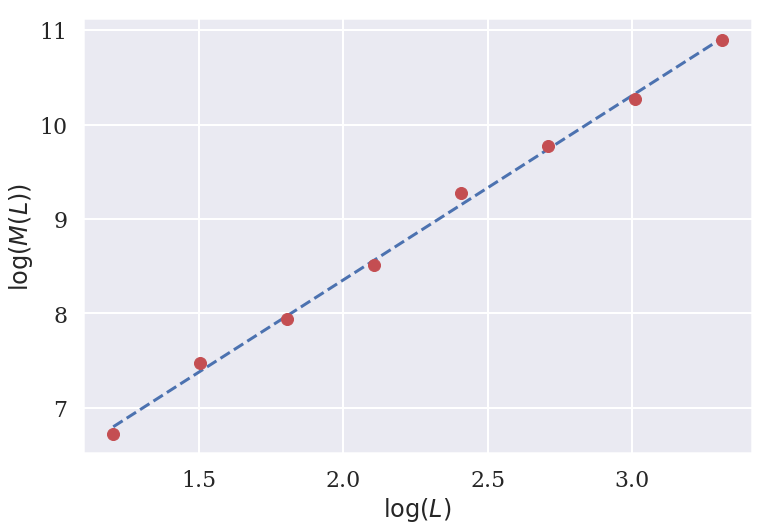

The D = 1.95237670614


In [16]:
from scipy.stats import linregress

D, b, _, _, _, = linregress(log10(Ls), log10(Ms))

plot(log10(Ls), D*log10(Ls) + b, 'b--')
plot(log10(Ls), log10(Ms), 'ro')
xlabel(r"$\log(L)$")
ylabel(r"$\log(M(L))$")
show()

print("The D = {}".format(D))